<a href="https://colab.research.google.com/github/SANDESHAHAHA/Data-science2/blob/main/Cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras


In [2]:
from tensorflow.keras import layers,models,datasets

In [3]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
X_train.shape,y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [5]:
X_test.shape,y_test.shape

((10000, 32, 32, 3), (10000, 1))

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
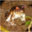

In [6]:
X_train[0]

In [7]:
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [8]:
y_train[:8]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7]], dtype=uint8)

In [9]:
y_train.shape

(50000, 1)

y_train is two dimensional arary so converting the two dimensional array into single dimension

In [10]:
y_train_flattened=y_train.reshape(1,-1).flatten()
y_train_flattened

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [11]:
y_test_flattened=y_test.reshape(1,-1).flatten()
y_test_flattened

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [12]:
labels[0]

'airplane'

In [13]:
def drawimg(i):
  plt.figure(figsize=(10,1))
  plt.imshow(X_train[i])
  plt.xlabel(labels[y_train_flattened[i]])

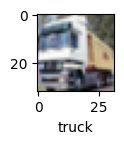

In [14]:
drawimg(1)

In [15]:
X_train=X_train/255
X_test=X_test/255
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

First we are making the artifical neural netwrok

In [16]:
X_train.shape

(50000, 32, 32, 3)

In [17]:
32*32*3

3072

In [18]:
ann_model =keras.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3072,activation='relu'),
    layers.Dense(1024,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])
ann_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
ann_model.fit(X_train,y_train_flattened,epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.2836 - loss: 2.2008
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3917 - loss: 1.6879
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4264 - loss: 1.5995
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4527 - loss: 1.5233
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4673 - loss: 1.4850


In [19]:
ann_model.evaluate(X_test,y_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4559 - loss: 1.5311


[1.5278866291046143, 0.45590001344680786]

In [20]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred=ann_model.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("Classification Report: \n",classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.57      0.53      1000
           1       0.63      0.50      0.56      1000
           2       0.41      0.15      0.22      1000
           3       0.31      0.37      0.34      1000
           4       0.41      0.35      0.38      1000
           5       0.43      0.31      0.36      1000
           6       0.39      0.74      0.51      1000
           7       0.66      0.35      0.46      1000
           8       0.46      0.72      0.56      1000
           9       0.56      0.49      0.52      1000

    accuracy                           0.46     10000
   macro avg       0.47      0.46      0.44     10000
weighted avg       0.47      0.46      0.44     10000



**Convulational Neural Network**

In [21]:
cnn=keras.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# softmax basically normalizes the probability
# class1: 0.45
# class2: 0.67

# class1: (0.45)/(0.45+0.67)

In [23]:
cnn.fit(X_train,y_train_flattened,epochs=20,validation_split=0.2)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3630 - loss: 1.7385 - val_accuracy: 0.5312 - val_loss: 1.3236
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5737 - loss: 1.2007 - val_accuracy: 0.6057 - val_loss: 1.1319
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6420 - loss: 1.0251 - val_accuracy: 0.6544 - val_loss: 0.9960
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6778 - loss: 0.9198 - val_accuracy: 0.6596 - val_loss: 0.9899
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7001 - loss: 0.8588 - val_accuracy: 0.6750 - val_loss: 0.9441
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7310 - loss: 0.7773 - val_accuracy: 0.6747 - val_loss: 0.9618
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7499 - loss: 0.7174 - val_accuracy: 0.6825 - val_loss: 0.9345
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7664 - loss: 0.671

In [24]:
cnn.evaluate(X_test,y_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6862 - loss: 1.3922


[1.433836579322815, 0.6787999868392944]

In [25]:
def drawtest(i):
  plt.figure(figsize=(10,1))
  plt.imshow(X_test[i])
  plt.xlabel(labels[y_test_flattened[i]])
  plt.show()

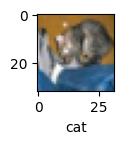

In [26]:
drawtest(0)

In [27]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[6.30085606e-06, 2.76005267e-06, 2.01340117e-05, 9.96714115e-01,
        1.27993655e-06, 3.15751182e-03, 9.76371884e-05, 1.80443003e-08,
        2.10943256e-07, 1.09808196e-09],
       [3.67330416e-04, 8.24011979e-04, 1.77917214e-09, 8.45405412e-10,
        2.43445146e-14, 1.70897748e-17, 8.27114266e-10, 8.04624125e-15,
        9.98799086e-01, 9.50545837e-06],
       [3.52539937e-03, 3.59427836e-03, 1.79004383e-06, 2.87870407e-05,
        3.26645059e-05, 7.72404505e-08, 2.69467392e-07, 1.89596263e-04,
        9.90036607e-01, 2.59061763e-03],
       [7.81626701e-01, 6.31755101e-05, 9.74181057e-06, 7.72644455e-08,
        4.19264069e-07, 1.53776691e-09, 4.97126618e-10, 1.96027813e-07,
        2.18298241e-01, 1.42275633e-06],
       [9.78720230e-12, 3.31863204e-10, 6.14721866e-05, 1.68874674e-03,
        2.13391826e-01, 1.53821389e-07, 7.84857750e-01, 4.67959786e-08,
        3.75663008e-11, 1.12272794e-13]], dtype=float32)

In [28]:
y_pred_number=[np.argmax(element) for element in y_pred]
y_pred_number[0]

np.int64(3)

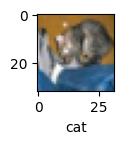

In [29]:
drawtest(0)

In [30]:
labels[7]

'horse'

In [31]:
print(" Report : \n",classification_report(y_test,y_pred_number))

 Report : 
               precision    recall  f1-score   support

           0       0.73      0.73      0.73      1000
           1       0.82      0.76      0.79      1000
           2       0.62      0.51      0.56      1000
           3       0.47      0.53      0.50      1000
           4       0.60      0.65      0.62      1000
           5       0.62      0.52      0.56      1000
           6       0.73      0.77      0.74      1000
           7       0.67      0.76      0.71      1000
           8       0.80      0.78      0.79      1000
           9       0.74      0.79      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [32]:
print("Classification Report : \n",classification_report(y_test,y_pred_number))

Classification Report : 
               precision    recall  f1-score   support

           0       0.73      0.73      0.73      1000
           1       0.82      0.76      0.79      1000
           2       0.62      0.51      0.56      1000
           3       0.47      0.53      0.50      1000
           4       0.60      0.65      0.62      1000
           5       0.62      0.52      0.56      1000
           6       0.73      0.77      0.74      1000
           7       0.67      0.76      0.71      1000
           8       0.80      0.78      0.79      1000
           9       0.74      0.79      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000

